<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Setup" data-toc-modified-id="Project-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Setup</a></span></li><li><span><a href="#Part-1:-Data-Preprocessing" data-toc-modified-id="Part-1:-Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 1: Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Calculating-distance" data-toc-modified-id="Calculating-distance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Calculating distance</a></span></li><li><span><a href="#Processing-Taxi-Data" data-toc-modified-id="Processing-Taxi-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Processing Taxi Data</a></span></li><li><span><a href="#Processing-Uber-Data" data-toc-modified-id="Processing-Uber-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Processing Uber Data</a></span></li><li><span><a href="#Processing-Weather-Data" data-toc-modified-id="Processing-Weather-Data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Processing Weather Data</a></span></li><li><span><a href="#Process-All-Data" data-toc-modified-id="Process-All-Data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Process All Data</a></span></li></ul></li><li><span><a href="#Part-2:-Storing-Cleaned-Data" data-toc-modified-id="Part-2:-Storing-Cleaned-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Part 2: Storing Cleaned Data</a></span><ul class="toc-item"><li><span><a href="#Add-Data-to-Database" data-toc-modified-id="Add-Data-to-Database-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Add Data to Database</a></span></li></ul></li><li><span><a href="#Part-3:-Understanding-the-Data" data-toc-modified-id="Part-3:-Understanding-the-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Part 3: Understanding the Data</a></span><ul class="toc-item"><li><span><a href="#Query-1" data-toc-modified-id="Query-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Query 1</a></span></li><li><span><a href="#Query-2" data-toc-modified-id="Query-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Query 2</a></span></li><li><span><a href="#Query-3" data-toc-modified-id="Query-3-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Query 3</a></span></li><li><span><a href="#Query-4" data-toc-modified-id="Query-4-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Query 4</a></span></li><li><span><a href="#Query-5" data-toc-modified-id="Query-5-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Query 5</a></span></li><li><span><a href="#Query-6" data-toc-modified-id="Query-6-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Query 6</a></span></li></ul></li><li><span><a href="#Part-4:-Visualizing-the-Data" data-toc-modified-id="Part-4:-Visualizing-the-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Part 4: Visualizing the Data</a></span><ul class="toc-item"><li><span><a href="#Visualization-1" data-toc-modified-id="Visualization-1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Visualization 1</a></span></li><li><span><a href="#Visualization-2" data-toc-modified-id="Visualization-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Visualization 2</a></span></li><li><span><a href="#Visualization-3" data-toc-modified-id="Visualization-3-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Visualization 3</a></span></li><li><span><a href="#Visualization-4" data-toc-modified-id="Visualization-4-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Visualization 4</a></span></li><li><span><a href="#Visualization-5" data-toc-modified-id="Visualization-5-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Visualization 5</a></span></li><li><span><a href="#Visualization-6" data-toc-modified-id="Visualization-6-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Visualization 6</a></span></li></ul></li></ul></div>

## Project Setup

In [1]:
# all import statements needed for the project, for example:

import gc
import glob
import math
import os
import re
from typing import Union, List, Tuple

import bs4
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import scipy.stats as st
import seaborn as sns
import sqlalchemy as db

from shapely.geometry import Point, Polygon, box
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# general notebook setup
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({"font.size": 15}) # font size

In [3]:
# Data Constant
TAXI_URL = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
UBER_CSV = "uber_rides_sample.csv"
WEATHER_DIRECTORY = 'weather/'
TAXI_ZONE_FILE = 'taxi_zones.shx'

# COORDS
NEW_YORK_BOX_COORDS = ((40.560445, -74.242330), (40.908524, -73.717047))
LGA_BOX_COORDS = ((40.762149, -73.891897), (40.786380, -73.852501))
JFK_BOX_COORDS = ((40.615818, -73.833447), (40.674007, -73.735256))
EWR_BOX_COORDS = ((40.667742, -74.198685), (40.713403, -74.150448))

# SQL
DATABASE_URL = "sqlite:///project.db"
DATABASE_SCHEMA_FILE = "schema.sql"
QUERY_DIRECTORY = "queries"

## Part 1: Data Preprocessing

### Calculating distance

1. Defining a function that calculates the distance between two coordinates in kilometers.
2. Defining a function that add a distance column to a existing dataframe with  

In [4]:
def calculate_distance(from_coord: Union[Tuple, List] , to_coord: Union[Tuple, List]) -> float:
    
    x1, y1 = from_coord
    x2, y2 = to_coord
    
    distance = math.sqrt((x1-x2)**2 + (y1-y2)**2)
    return distance

In [5]:
calculate_distance((-70, 40), (-71, 41))

1.4142135623730951

In [6]:
def add_distance_column(dataframe: pd.DataFrame) -> None:
    
    dataframe['distance'] = \
        dataframe.apply(lambda x: calculate_distance(x[['pickupLon', 'pickupLat']], x[['dropoffLon', 'dropoffLat']]), axis=1)
    
    dataframe['distance'] = dataframe['distance'].astype(np.float32)

In [7]:
dataframe = pd.DataFrame({
    'pickupLon': [-70.],
    'pickupLat': [40.],
    'dropoffLon': [-71.],
    'dropoffLat': [41.]
})

add_distance_column(dataframe)
dataframe

,pickupLon,pickupLat,dropoffLon,dropoffLat,distance
0,-70.0,40.0,-71.0,41.0,1.414214


### Processing Taxi Data

1. Finding all urls for taxi Yellow Taxi Parquet files from 2009-01 to 2015-06.
2. Defining a function to programmatically download the Yellow Taxi Parquet files, then clening and filtering for the desired data.
3. Defining a function to call the defined function for each url.


In [8]:
def find_taxi_csv_urls() -> None:
    
    response = requests.get(TAXI_URL)
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    
    csv_urls = []
    for a in soup.find_all('a', title='Yellow Taxi Trip Records'):
        url = a.get('href')
        month = re.findall(r'yellow_tripdata_([0-9-]*).parquet', url)[0]
        
        if not '2009-01' <= month <= '2015-06':
            continue
        
        csv_urls.append(url)

    return sorted(csv_urls)


In [9]:
find_taxi_csv_urls()

['https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-01.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-02.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-03.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-04.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-05.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-06.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-07.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-08.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-09.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-10.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-11.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-12.pa

In [10]:
def get_and_clean_month_taxi_data(url: str) -> pd.DataFrame:

    filepath = 'cache/' + url.split('/')[-1]
    
    if not os.path.exists(filepath):
        
        response = requests.get(url, stream=True)
        with open(filepath, 'wb') as fp:
            for chunk in response.iter_content(chunk_size=512):
                if chunk:
                    fp.write(chunk)
    
    df_taxi = pd.read_parquet(filepath)
    df_taxi = df_taxi.iloc[::5000] # Sample at fixed intervals

    taxi_zones = gpd.read_file(TAXI_ZONE_FILE).to_crs('EPSG:4326')
    taxi_zones['centroid_longitude'] = taxi_zones.centroid.x
    taxi_zones['centroid_latitude'] = taxi_zones.centroid.y
    taxi_zones = taxi_zones[['LocationID', 'centroid_longitude', 'centroid_latitude']] # drop unnecessary columns
    
    # Looking up longitude and latitude for some months where only location IDs are given for pickups and dropoffs,
    # and normalizing the column names for pickups and dropoffs
    if 'PULocationID' in df_taxi.columns:

        df_taxi = pd.merge(df_taxi, taxi_zones, left_on='PULocationID', right_on='LocationID').\
            rename(columns={'centroid_longitude': 'pickupLon', 'centroid_latitude': 'pickupLat'}).\
            drop(['PULocationID', 'LocationID'], axis=1)
        
    elif 'pickup_longitude' in df_taxi.columns:
        df_taxi = df_taxi.rename(columns={'pickup_longitude': 'pickupLon', 'pickup_latitude': 'pickupLat'})
    
    else:
        df_taxi = df_taxi.rename(columns={'Start_Lon': 'pickupLon', 'Start_Lat': 'pickupLat'})
    
    if 'DOLocationID' in df_taxi.columns:
        df_taxi = pd.merge(df_taxi, taxi_zones, left_on='DOLocationID', right_on='LocationID').\
            rename(columns={'centroid_longitude': 'dropoffLon', 'centroid_latitude': 'dropoffLat'}).\
            drop(['DOLocationID', 'LocationID'], axis=1)
    
    elif 'dropoff_latitude' in df_taxi.columns:
        df_taxi = df_taxi.rename(columns={'dropoff_longitude': 'dropoffLon', 'dropoff_latitude': 'dropoffLat'})
        
    else:
        df_taxi = df_taxi.rename(columns={'End_Lon': 'dropoffLon', 'End_Lat': 'dropoffLat'})
    
    # removing trips that start and/or end outside of the new york coordinate box
    new_york_box = box(NEW_YORK_BOX_COORDS[0][1], NEW_YORK_BOX_COORDS[0][0], NEW_YORK_BOX_COORDS[1][1], NEW_YORK_BOX_COORDS[1][0])
    isvalid = gpd.GeoSeries.from_xy(df_taxi.pickupLon, df_taxi.pickupLat).within(new_york_box) & \
        gpd.GeoSeries.from_xy(df_taxi.dropoffLon, df_taxi.dropoffLat).within(new_york_box)

    df_taxi = df_taxi[isvalid]
    
    # normalizing column names for different cases
    # case 1
    df_taxi = df_taxi.rename(
        columns={
            'Trip_Pickup_DateTime': 'pickupDateTime',
            'pickup_datetime': 'pickupDateTime',
            'tpep_pickup_datetime': 'pickupDateTime'
        }
    )
    
    df_taxi = df_taxi.rename(
        columns={
            'Trip_Dropoff_DateTime': 'dropoffDateTime',
            'dropoff_datetime': 'dropoffDateTime',
            'tpep_dropoff_datetime': 'dropoffDateTime'
        }
    )
    
    df_taxi = df_taxi.rename(
        columns={
            'Tip_Amt': 'tipAmt',
            'tip_amount': 'tipAmt'
        }
    )

    # removing unnecessary columns
    df_taxi = df_taxi[['pickupDateTime', 'dropoffDateTime', 'pickupLon', 'pickupLat', 'dropoffLon', 'dropoffLat', 'tipAmt']]
    
    # removing invalid data points
    df_taxi = df_taxi.dropna()
    
    # normalizing and using appropriate and memory-saving column types for the respective data
    df_taxi['pickupDateTime'] = pd.to_datetime(df_taxi['pickupDateTime'])
    df_taxi['dropoffDateTime'] = pd.to_datetime(df_taxi['dropoffDateTime'])
    df_taxi = df_taxi.astype({col: np.float32 for col in df_taxi.select_dtypes(np.float64)})

    return df_taxi


In [11]:
get_and_clean_month_taxi_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2011-01.parquet')

,pickupDateTime,dropoffDateTime,pickupLon,pickupLat,dropoffLon,dropoffLat,tipAmt
0,2011-01-01 00:10:00,2011-01-01 00:12:00,-73.948891,40.745380,-73.948891,40.745380,0.28
1,2011-01-17 15:12:00,2011-01-17 15:18:00,-73.948891,40.745380,-73.948891,40.745380,0.00
2,2011-01-17 15:13:00,2011-01-17 15:16:00,-73.948891,40.745380,-73.948891,40.745380,0.00
3,2011-01-25 12:54:00,2011-01-25 13:10:00,-73.948891,40.745380,-73.948891,40.745380,0.00
4,2011-01-07 01:32:00,2011-01-07 01:47:00,-73.985939,40.727619,-73.948891,40.745380,0.00
...,...,...,...,...,...,...,...
2617,2011-01-23 16:00:00,2011-01-23 16:04:00,-73.939285,40.674469,-73.939285,40.674469,0.00
2618,2011-01-16 23:52:38,2011-01-16 23:57:30,-73.926155,40.837826,-73.926155,40.837826,1.00
2619,2011-01-24 22:24:00,2011-01-24 22:25:00,-74.102310,40.638973,-74.102310,40.638973,0.00
2620,2011-01-25 01:45:00,2011-01-25 01:49:00,-73.842812,40.780910,-73.842812,40.780910,0.00


In [12]:
def get_and_clean_taxi_data() -> pd.DataFrame:
    
#     return pd.read_parquet('./tmp.parquet')
    
    os.makedirs('cache/', exist_ok=True)
    all_taxi_dataframes = []
    
    all_csv_urls = find_taxi_csv_urls()
    for csv_url in all_csv_urls[:]:
        
        print(csv_url)
        
        dataframe = get_and_clean_month_taxi_data(csv_url)
            
        add_distance_column(dataframe)
        all_taxi_dataframes.append(dataframe)
        
        del dataframe
        gc.collect()
        
    # create one gigantic dataframe with data from every month needed
    taxi_data = pd.concat(all_taxi_dataframes)
    return taxi_data


### Processing Uber Data

1. Loading and cleaning the uber data.
2. Adding distance column to the processed uber data.

In [13]:
def load_and_clean_uber_data(csv_file: str):

    df_uber = pd.read_csv(csv_file, index_col=0)
    
    new_york_box = box(NEW_YORK_BOX_COORDS[0][1], NEW_YORK_BOX_COORDS[0][0], NEW_YORK_BOX_COORDS[1][1], NEW_YORK_BOX_COORDS[1][0])

    isvalid = gpd.GeoSeries.from_xy(df_uber.pickup_longitude, df_uber.pickup_latitude).within(new_york_box) & \
        gpd.GeoSeries.from_xy(df_uber.dropoff_longitude, df_uber.dropoff_latitude).within(new_york_box)

    df_uber = df_uber[isvalid]
    
    df_uber = df_uber.rename(columns={
        'pickup_datetime': 'pickupDateTime',
        'pickup_longitude': 'pickupLon',
        'pickup_latitude': 'pickupLat',
        'dropoff_longitude': 'dropoffLon',
        'dropoff_latitude': 'dropoffLat'
    })
    
    df_uber = df_uber[['pickupDateTime', 'pickupLon', 'pickupLat', 'dropoffLon', 'dropoffLat']]
    
    df_uber = df_uber.dropna()
    
    df_uber['pickupDateTime'] = pd.to_datetime(df_uber['pickupDateTime'].str[:-4])
    df_uber = df_uber.astype({col: np.float32 for col in df_uber.select_dtypes(np.float64)})
    
    return df_uber


In [14]:
load_and_clean_uber_data('uber_rides_sample.csv')

,pickupDateTime,pickupLon,pickupLat,dropoffLon,dropoffLat
24238194,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217
27835199,2009-07-17 20:04:56,-73.994354,40.728226,-73.994713,40.750324
44984355,2009-08-24 21:45:00,-74.005043,40.740768,-73.962563,40.772648
25894730,2009-06-26 08:22:21,-73.976128,40.790844,-73.965317,40.803349
17610152,2014-08-28 17:47:00,-73.925026,40.744083,-73.973083,40.761246
...,...,...,...,...,...
42598914,2012-10-28 10:49:00,-73.987045,40.739368,-73.986526,40.740295
16382965,2014-03-14 01:09:00,-73.984718,40.736835,-74.006676,40.739620
27804658,2009-06-29 00:42:00,-73.986015,40.756489,-73.858955,40.692589
20259894,2015-05-20 14:56:25,-73.997124,40.725452,-73.983215,40.695415


In [15]:
def get_uber_data():
    uber_dataframe = load_and_clean_uber_data(UBER_CSV)
    add_distance_column(uber_dataframe)
    return uber_dataframe

### Processing Weather Data

1. Loading weather data, cleaning and filtering for desired columns, converting float64 to float32 for saving memory.
2. Using average value in respective date frame to generate daily and hourly frequency data.

In [16]:
def clean_monthly_weather(csv_file: str) -> pd.DataFrame:
    
    df_weather = pd.read_csv(csv_file)[['DATE', 'HourlyWindSpeed', 'HourlyPrecipitation']]
    df_weather['HourlyPrecipitation'] = pd.to_numeric(df_weather['HourlyPrecipitation'], errors='coerce')
    df_weather = df_weather.fillna(0.)
    
    df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])
    
    if '2015' in csv_file:
        df_weather = df_weather.query("DATE < '2015-07-01 00:00:00'") # drop data not in date frame
    
    df_weather['day'] = df_weather['DATE'].dt.strftime('%Y-%m-%d')
    df_weather['hour'] = df_weather['DATE'].dt.strftime('%H')
    
    df_weather = df_weather.astype({col: np.float32 for col in df_weather.select_dtypes(np.float64)})
    
    return df_weather


In [17]:
clean_monthly_weather('weather/2009_weather.csv')

,DATE,HourlyWindSpeed,HourlyPrecipitation,day,hour
0,2009-01-01 00:51:00,18.0,0.00,2009-01-01,00
1,2009-01-01 01:51:00,18.0,0.00,2009-01-01,01
2,2009-01-01 02:51:00,18.0,0.00,2009-01-01,02
3,2009-01-01 03:51:00,8.0,0.00,2009-01-01,03
4,2009-01-01 04:51:00,11.0,0.00,2009-01-01,04
...,...,...,...,...,...
11118,2009-12-31 20:51:00,0.0,0.01,2009-12-31,20
11119,2009-12-31 21:37:00,0.0,0.03,2009-12-31,21
11120,2009-12-31 21:51:00,0.0,0.03,2009-12-31,21
11121,2009-12-31 22:51:00,6.0,0.02,2009-12-31,22


In [18]:
def clean_month_weather_data_hourly(csv_file: str) -> pd.DataFrame:
    
    df_weather = clean_monthly_weather(csv_file)
    df_weather_hourly = df_weather.groupby(['day', 'hour'])[['HourlyWindSpeed', 'HourlyPrecipitation']].mean().reset_index()
    
    df_weather_hourly = df_weather_hourly.rename(columns={'HourlyWindSpeed': 'hourlyWindSpeed', 'HourlyPrecipitation': 'hourlyPrecipitation'})
    
    df_weather_hourly = df_weather_hourly.dropna()
    
    return df_weather_hourly


In [19]:
clean_month_weather_data_hourly('weather/2009_weather.csv')

,day,hour,hourlyWindSpeed,hourlyPrecipitation
0,2009-01-01,00,18.0,0.00
1,2009-01-01,01,18.0,0.00
2,2009-01-01,02,18.0,0.00
3,2009-01-01,03,8.0,0.00
4,2009-01-01,04,11.0,0.00
...,...,...,...,...
8555,2009-12-31,19,3.0,0.00
8556,2009-12-31,20,0.0,0.01
8557,2009-12-31,21,0.0,0.03
8558,2009-12-31,22,6.0,0.02


In [20]:
def clean_month_weather_data_daily(csv_file: str):
    
    df_weather = clean_monthly_weather(csv_file)
    df_weather_daily = df_weather.groupby('day')[['HourlyWindSpeed', 'HourlyPrecipitation']].mean().reset_index()
    df_weather_daily = df_weather_daily.rename(columns={'HourlyWindSpeed': 'dailyWindSpeed', 'HourlyPrecipitation': 'dailyPrecipitation'})
    
    df_weather_daily = df_weather_daily.dropna()
    
    return df_weather_daily


In [21]:
clean_month_weather_data_daily('weather/2009_weather.csv')

,day,dailyWindSpeed,dailyPrecipitation
0,2009-01-01,11.041667,0.0000
1,2009-01-02,6.593750,0.0000
2,2009-01-03,9.875000,0.0000
3,2009-01-04,7.370370,0.0000
4,2009-01-05,6.925926,0.0000
...,...,...,...
357,2009-12-27,7.525000,0.0195
358,2009-12-28,8.958333,0.0000
359,2009-12-29,14.208333,0.0000
360,2009-12-30,5.666667,0.0000


In [22]:
def load_and_clean_weather_data():
    hourly_dataframes = []
    daily_dataframes = []
    
    # paths for weather csv files
    weather_csv_files = sorted(glob.glob(WEATHER_DIRECTORY + '/*.csv'))
    
    for csv_file in weather_csv_files:
        hourly_dataframe = clean_month_weather_data_hourly(csv_file)
        daily_dataframe = clean_month_weather_data_daily(csv_file)
        
        hourly_dataframes.append(hourly_dataframe)
        daily_dataframes.append(daily_dataframe)
        
    # create two dataframes with hourly & daily data from every month
    hourly_data = pd.concat(hourly_dataframes)
    daily_data = pd.concat(daily_dataframes)
    
    return hourly_data, daily_data

### Process All Data

Just run all the functions defined above to get the final data.

In [23]:
taxi_data = get_and_clean_taxi_data()
uber_data = get_uber_data()
hourly_weather_data, daily_weather_data = load_and_clean_weather_data() #TODO

https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-01.parquet
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-02.parquet
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-03.parquet
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-04.parquet
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-05.parquet
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-06.parquet
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-07.parquet
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-08.parquet
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-09.parquet
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-10.parquet
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-11.parquet
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-12.parquet
https://d37ci6vzurychx.cloudfront.net/tr

## Part 2: Storing Cleaned Data

In Part 2, we will take the sample datasets generated from Part 1, and
populating a SQLite database with tables generated from the datasets.

1. Using SQLAlchemy to create a SQLite database to store the processed data.
2. Creating four tables for respective dataframe:
    1. one for sampled datasets of Yellow Taxi trips
    2. one for Uber trips
    3. one for hourly weather data
    4. one for daily weather data
3. Creating a schema.sql file and saving each table’s schema.

In [24]:
engine = db.create_engine(DATABASE_URL)

In [25]:
# Schema to create our 4 tables/dataframes
HOURLY_WEATHER_SCHEMA = """
CREATE TABLE IF NOT EXISTS hourlyWeather (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    day DATE,
    hour INTEGER,
    hourlyWindSpeed,
    hourlyPrecipitation
);
"""

DAILY_WEATHER_SCHEMA = """
CREATE TABLE IF NOT EXISTS dailyWeather (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    day DATE,
    dailyWindSpeed,
    dailyPrecipitation
);
"""

TAXI_TRIPS_SCHEMA = """
CREATE TABLE IF NOT EXISTS taxiTrips (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    pickupDateTime DATETIME,
    dropoffDateTime DATETIME,
    pickupLon FLOAT,
    pickupLat FLOAT,
    dropoffLon FLOAT,
    dropoffLat FLOAT,
    distance FLOAT,
    tipAmt FLOAT
);
"""

UBER_TRIPS_SCHEMA = """
CREATE TABLE IF NOT EXISTS uberTrips (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    pickupDateTime DATETIME,
    pickupLon FLOAT,
    pickupLat FLOAT,
    dropoffLon FLOAT,
    dropoffLat FLOAT,
    distance FLOAT
);
"""

In [26]:
# create that required schema.sql file
with open(DATABASE_SCHEMA_FILE, "w") as f:
    
    f.write(HOURLY_WEATHER_SCHEMA)
    f.write(DAILY_WEATHER_SCHEMA)
    f.write(TAXI_TRIPS_SCHEMA)
    f.write(UBER_TRIPS_SCHEMA)

In [27]:
# !sqlite3 project.db < schema.sql

In [28]:
# create the tables with the schema files
with engine.connect() as connection:
    
    connection.execute(HOURLY_WEATHER_SCHEMA)
    connection.execute(DAILY_WEATHER_SCHEMA)
    connection.execute(TAXI_TRIPS_SCHEMA)
    connection.execute(UBER_TRIPS_SCHEMA)

### Add Data to Database

Inserting data into the created SQLite database from processed dataframes in Part 1 

In [29]:
def write_dataframes_to_table(table_to_df_dict: dict) -> None:
    
    with engine.connect() as connection:
        
        for table_name, dataframe in table_to_df_dict.items():
            dataframe.to_sql(table_name, connection, if_exists='append', index=False)

In [30]:
map_table_name_to_dataframe = {
    "taxiTrips": taxi_data,
    "uberTrips": uber_data,
    "hourlyWeather": hourly_weather_data,
    "dailyWeather": daily_weather_data,
}

In [31]:
write_dataframes_to_table(map_table_name_to_dataframe)

## Part 3: Understanding the Data

In this part, we will define a SQL query for each of the given questions one by one, and save each query as a .sql file.

In [32]:
def write_query_to_file(query, outfile):
    os.makedirs(QUERY_DIRECTORY, exist_ok=True)
    
    with open(QUERY_DIRECTORY + '/' + outfile, 'w') as fp:
        fp.write(query)

### Query 1

For 01-2009 through 06-2015, what hour of the day was the most popular to take a yellow taxi? The result should have 24 bins.

In [33]:
QUERY_1 = """
    SELECT strftime('%H', pickupDateTime) AS hourOfDay, count(*) AS numTrips
    FROM taxiTrips
    GROUP BY hourOfDay
    ORDER BY numTrips DESC
"""

engine.execute(QUERY_1).fetchall()

[('19', 40761),
 ('18', 38694),
 ('20', 37923),
 ('21', 37020),
 ('22', 35976),
 ('14', 32499),
 ('17', 32181),
 ('23', 31953),
 ('13', 31512),
 ('12', 31509),
 ('15', 30999),
 ('09', 30216),
 ('11', 29568),
 ('10', 29310),
 ('08', 29256),
 ('16', 26898),
 ('00', 25827),
 ('07', 23337),
 ('01', 18798),
 ('02', 13941),
 ('06', 13320),
 ('03', 10263),
 ('04', 7617),
 ('05', 6369)]

In [34]:
write_query_to_file(QUERY_1, "most_polular_hour_taxi.sql")

### Query 2

For the same time frame, what day of the week was the most popular to take an Uber? The result should have 7 bins.

In [35]:
QUERY_2 = """
    SELECT strftime('%w', pickupDateTime) AS dayOfWeek, count(*) AS numTrips
    FROM uberTrips
    GROUP BY dayOfWeek
    ORDER BY numTrips DESC
"""

engine.execute(QUERY_2).fetchall()

[('5', 90498),
 ('6', 88797),
 ('4', 88014),
 ('3', 84984),
 ('2', 82578),
 ('0', 77502),
 ('1', 74043)]

In [36]:
write_query_to_file(QUERY_2, "most_polular_day_uber.sql")

### Query 3

What is the 95% percentile of distance traveled for all hired trips during July 2013?

In [37]:
QUERY_3 = """
    
    WITH distance AS (
        SELECT distance FROM (
            SELECT pickupDateTime, distance
            FROM taxiTrips
            UNION ALL
            SELECT pickupDateTime, distance
            FROM uberTrips
        )
        WHERE strftime('%Y-%m', pickupDateTime) == '2013-07'
    )
    SELECT * 
    FROM distance
    ORDER BY distance ASC 
    LIMIT 1
    OFFSET (SELECT count(*) FROM distance) * 95 / 100 - 1
"""

engine.execute(QUERY_3).fetchall()

[(0.11076075583696365,)]

In [38]:
write_query_to_file(QUERY_3, "percentile_95_of_distance.sql")

### Query 4

What were the top 10 days with the highest number of hired rides for 2009, and what was the average distance for each day?

In [39]:
QUERY_4 = """
    SELECT date, COUNT(distance) AS countOfday, AVG(distance) from (
        SELECT strftime('%m-%d', pickupDateTime) as date, distance
        FROM taxiTrips
        WHERE strftime('%Y', pickupDateTime) == '2009'
        UNION ALL
        SELECT strftime('%m-%d', pickupDateTime) AS date, distance
        FROM uberTrips
        WHERE strftime('%Y', pickupDateTime) == '2009'
    )
    GROUP BY date
    ORDER BY countOfday DESC LIMIT 10
"""

engine.execute(QUERY_4).fetchall()

[('12-11', 744, 0.028502664221788668),
 ('09-11', 696, 0.023540267751929512),
 ('12-05', 684, 0.02847858472242686),
 ('11-13', 684, 0.028321987022688216),
 ('06-05', 672, 0.030686882693511768),
 ('12-04', 666, 0.027750899218550364),
 ('10-31', 666, 0.03180315232178121),
 ('04-23', 660, 0.02851929356481626),
 ('02-20', 660, 0.03127719306644394),
 ('04-04', 654, 0.029237413942309762)]

In [40]:
write_query_to_file(QUERY_4, "top_10_highest_rides_days.sql")

### Query 5

 Which 10 days in 2014 were the windiest, and how many hired trips were made on those days?

In [41]:
QUERY_5 = """
    SELECT strftime('%Y-%m-%d', pickupDateTime) AS windiestDay, count(*) 
    FROM (
        SELECT pickupDateTime
        FROM taxiTrips
        UNION ALL
        SELECT pickupDateTime
        FROM uberTrips
    )
    WHERE windiestDay IN ( 
        SELECT strftime('%Y-%m-%d', day)
        FROM dailyWeather
        WHERE strftime('%Y', day) == '2014'
        ORDER BY dailyWindSpeed DESC LIMIT 10
    )
    GROUP BY windiestDay
"""

engine.execute(QUERY_5).fetchall()

[('2014-01-02', 402),
 ('2014-01-07', 504),
 ('2014-02-13', 384),
 ('2014-03-13', 642)]

In [42]:
write_query_to_file(QUERY_5, "num_trips_in_windiest_days.sql")

### Query 6

During Hurricane Sandy in NYC (Oct 29-30, 2012) and the week leading up to it, how many trips were taken each hour, and for each hour, how much precipitation did NYC receive and what was the sustained wind speed?

In [43]:
QUERY_6 = """
    WITH RECURSIVE hours(x) AS (
        SELECT '2012-10-30 23:00:00'
        UNION ALL
        SELECT DATETIME(x, '-1 hours') FROM hours WHERE x > '2012-10-22 00:00:00'
    ),
    trips(x) AS (
        SELECT pickupDateTime
        FROM taxiTrips
        UNION ALL
        SELECT pickupDateTime
        FROM uberTrips
    ),
    hourly_trips(hour, numTrips) AS (
        SELECT strftime('%Y-%m-%d-%H', hours.x) AS hour, count(*)
        FROM hours, trips
        WHERE hour == strftime('%Y-%m-%d-%H', trips.x)
        GROUP BY hour
    )
    SELECT hourly_trips.hour, numTrips, hourlyWeather.hourlyPrecipitation
    FROM hourly_trips, hourlyWeather
    WHERE hourly_trips.hour == strftime('%Y-%m-%d', hourlyWeather.day) || '-' || hourlyWeather.hour 
    ORDER BY hourly_trips.hour ASC
"""

engine.execute(QUERY_6).fetchall()

[('2012-10-22-10', 18, 0.0),
 ('2012-10-22-10', 18, 0.0),
 ('2012-10-22-10', 18, 0.0),
 ('2012-10-22-11', 36, 0.0),
 ('2012-10-22-11', 36, 0.0),
 ('2012-10-22-11', 36, 0.0),
 ('2012-10-22-12', 30, 0.0),
 ('2012-10-22-12', 30, 0.0),
 ('2012-10-22-12', 30, 0.0),
 ('2012-10-22-13', 36, 0.0),
 ('2012-10-22-13', 36, 0.0),
 ('2012-10-22-13', 36, 0.0),
 ('2012-10-22-14', 18, 0.0),
 ('2012-10-22-14', 18, 0.0),
 ('2012-10-22-14', 18, 0.0),
 ('2012-10-22-15', 15, 0.0),
 ('2012-10-22-15', 15, 0.0),
 ('2012-10-22-15', 15, 0.0),
 ('2012-10-22-16', 30, 0.0),
 ('2012-10-22-16', 30, 0.0),
 ('2012-10-22-16', 30, 0.0),
 ('2012-10-22-17', 27, 0.0),
 ('2012-10-22-17', 27, 0.0),
 ('2012-10-22-17', 27, 0.0),
 ('2012-10-22-18', 45, 0.0),
 ('2012-10-22-18', 45, 0.0),
 ('2012-10-22-18', 45, 0.0),
 ('2012-10-22-19', 24, 0.0),
 ('2012-10-22-19', 24, 0.0),
 ('2012-10-22-19', 24, 0.0),
 ('2012-10-22-20', 30, 0.0),
 ('2012-10-22-20', 30, 0.0),
 ('2012-10-22-20', 30, 0.0),
 ('2012-10-22-21', 18, 0.0),
 ('2012-10-22-

In [44]:
write_query_to_file(QUERY_6, "hourly_num_trips_and_precipitation_in_nyc.sql")

## Part 4: Visualizing the Data

In this final part, we will create a bunch of visualizations embedded in this notebook according to the given questions.
* First, we will query the SQL tables to get desired data.
* Next, we will parse data with pandas
* Finally, we will generate a visualization with matplotlib and/or seaborn

### Visualization 1
Create an appropriate visualization for the first query/question in part 3

In [45]:


def plot_hourly_num_trips_dynamic(dataframe):

    fig = plt.figure(figsize=(20, 10))
    axis = plt.axes(xlim =(0, 24), ylim=(0, 15000), xlabel='Hour of day', ylabel='Number of trips', title='Number of trips hourly')

    line, = axis.plot([], [], lw = 2)

    def init():
        line.set_data([], [])
        return line,

    xdata, ydata = [], []
    
    values = dataframe.sort_values(by='hourOfDay')['numTrips'].tolist()
    # animation function
    def animate(i):

        xdata.append(i)
        ydata.append(values[i])
        line.set_data(xdata, ydata)

        return line,

    anim = FuncAnimation(fig, animate,
                         init_func = init,
                         frames = 24,
                         interval = 200,
                         blit = True)

    return HTML(anim.to_jshtml())

In [46]:
def get_hourly_num_trips():
    
    df = pd.read_sql(QUERY_1, engine)
    return df


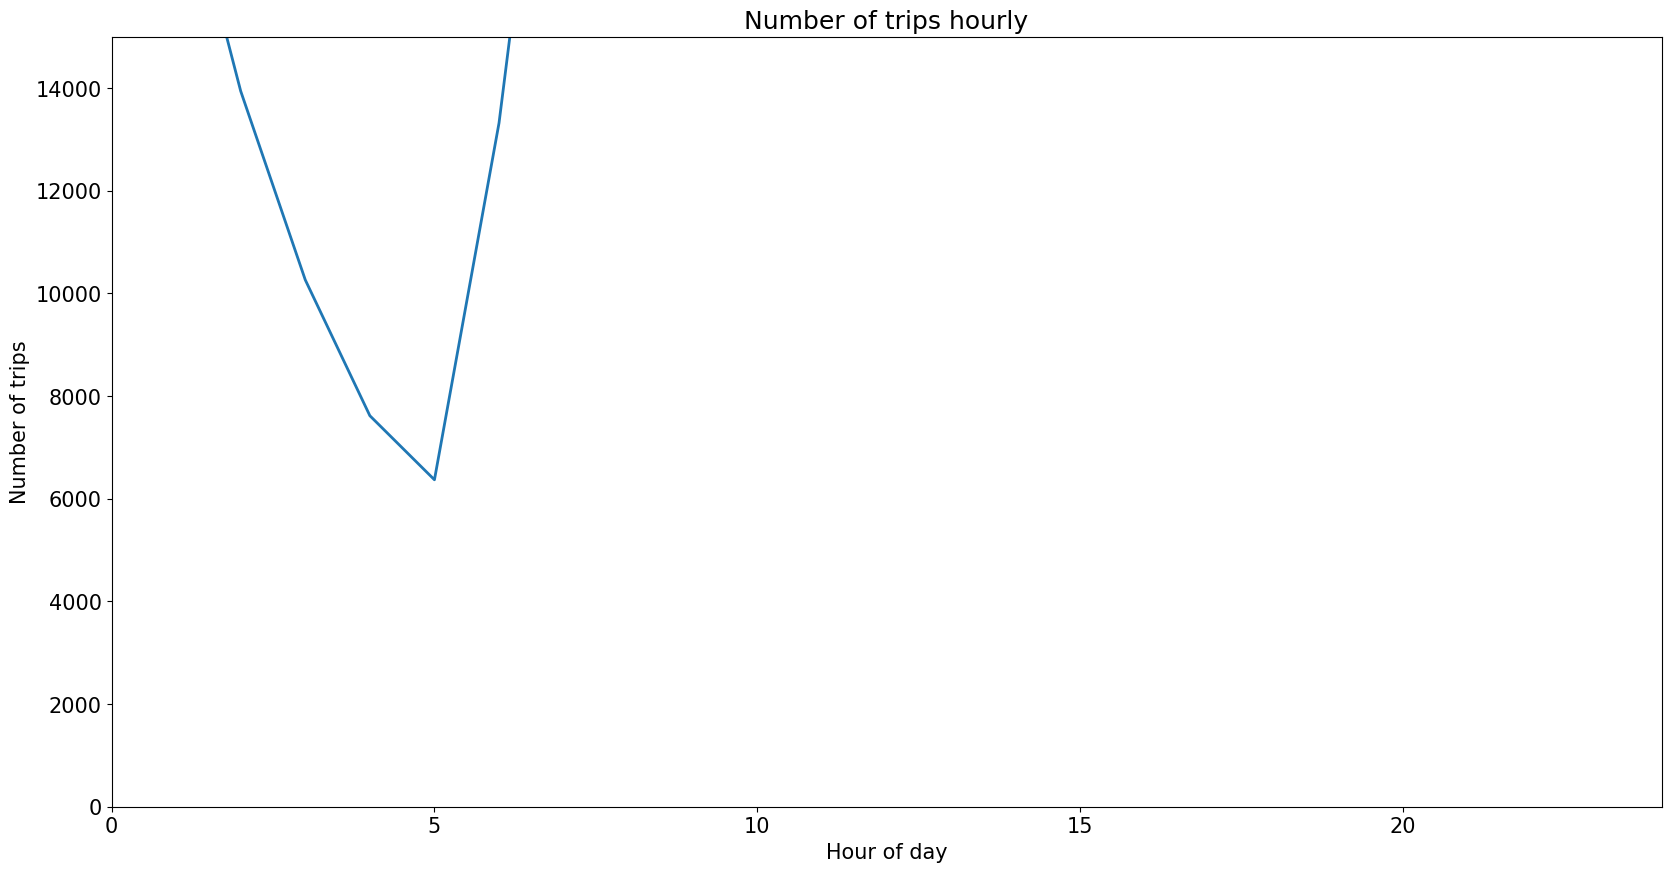

In [47]:
df_num_trips = get_hourly_num_trips()
plot_hourly_num_trips_dynamic(df_num_trips)

### Visualization 2
Create a visualization that shows the average distance traveled per month (regardless of year - so group by each month). Include the 90% confidence interval around the mean in the visualization

In [48]:

def plot_avg_distance_per_month(dataframe: pd.DataFrame):
    figure, axes = plt.subplots(figsize=(20, 10))
    
    def cal_mean_ci(x):
        _, upper = st.t.interval(alpha=0.95, df=len(x)-1, loc=np.mean(x), scale=st.sem(x))

        return pd.DataFrame({'mean': x.mean(), 'error': upper - x.mean()})

    mean_error = df_distance.groupby('month').apply(cal_mean_ci).droplevel(1)
    
    axes.errorbar(x=mean_error.index, y=mean_error['mean'], yerr=mean_error['error'])
    
    axes.set_xlabel('Month')
    axes.set_ylabel('Avg distance')
    axes.set_title("Avg distance and confidence interval per month")
    
    plt.show()

In [49]:
def get_data_distance():
    
    query = """
        SELECT strftime('%m', pickupDateTime) AS month, distance FROM (
            SELECT pickupDateTime, distance FROM taxiTrips
            UNION ALL
            SELECT pickupDateTime, distance FROM uberTrips
        )
    """
    
    df = pd.read_sql(query, engine)
    return df


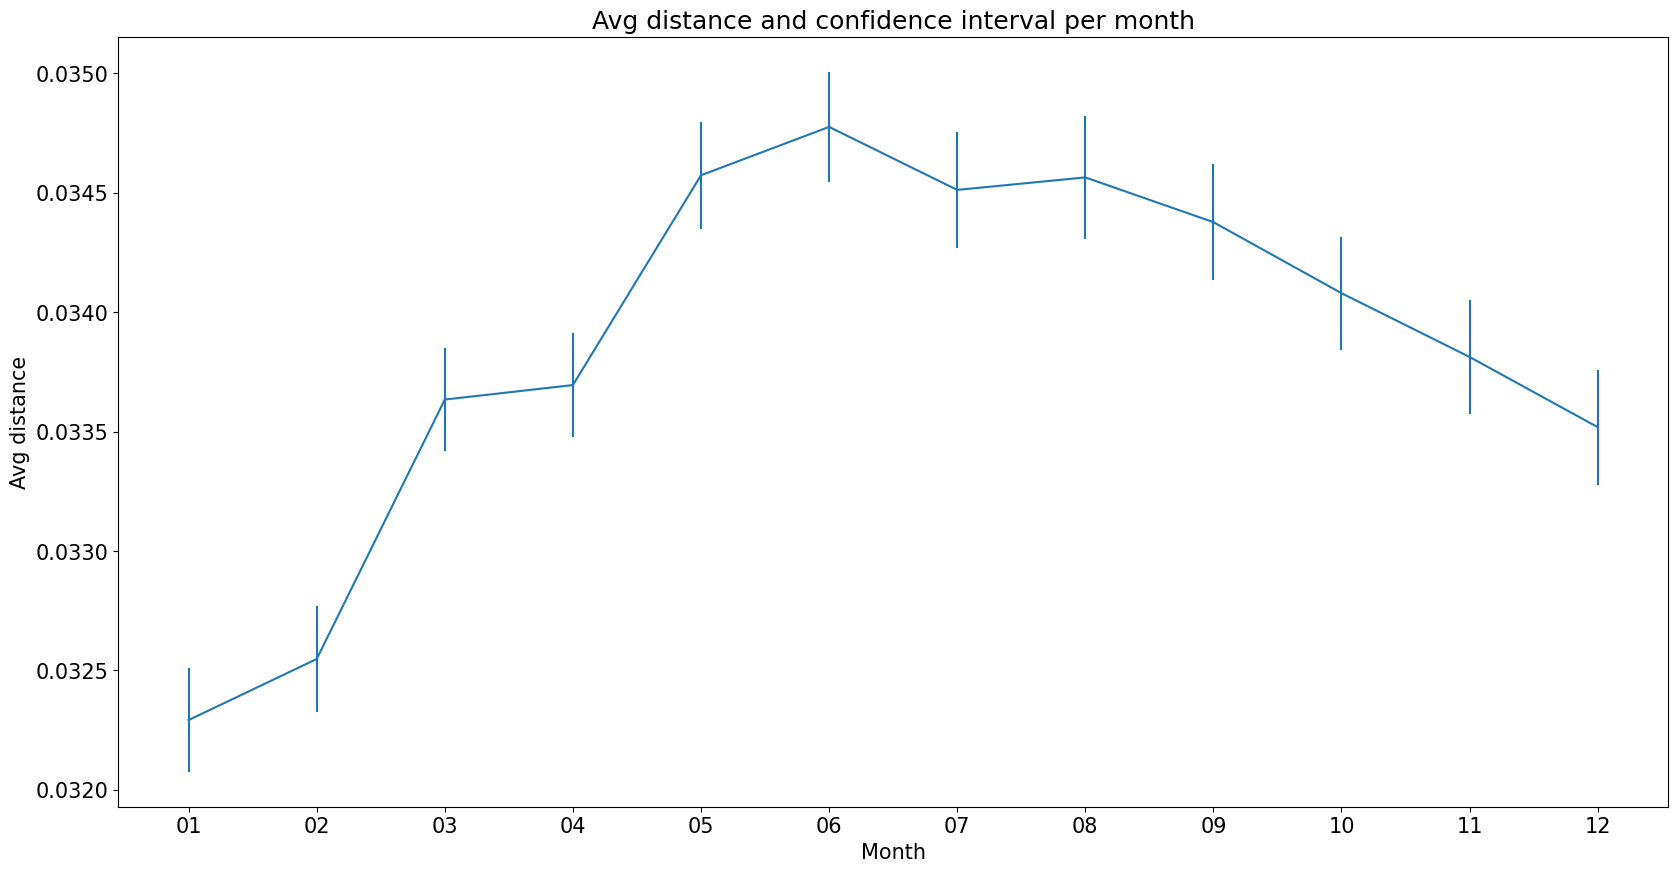

In [50]:
df_distance = get_data_distance()
plot_avg_distance_per_month(df_distance)


### Visualization 3
Define three lat/long coordinate boxes around the three major New York airports: LGA, JFK, and EWR (you can use bboxfinder to help). Create a visualization that compares what day of the week was most popular for drop offs for each airport.

For Uber data, There is no dropoff datetime, we use pickup datetime instead.

In [51]:

def plot_daily_ariports_dropoff(dataframe: pd.DataFrame) -> None:
    figure, axes = plt.subplots(figsize=(20, 10))
    
    df_group_count = dataframe.groupby(['airport', 'dayOfWeek']).size().reset_index()
    sns.lineplot(df_group_count, x='dayOfWeek', y=0, hue='airport', ax=axes)
    
    axes.set_xlabel('Hour of day')
    axes.set_ylabel('Number of trips')
    axes.set_title("Number of trips daily by airport")
    
    plt.show()

In [52]:
def get_data_daily_ariports_dropoff() -> pd.DataFrame:
    
    query = """
        SELECT strftime('%w', dropoffDateTime) AS dayOfWeek, dropOffLon, dropOffLat
        FROM taxiTrips
        UNION ALL
        SELECT strftime('%w', pickupDateTime) AS dayOffWeek, dropOffLon, dropOffLat
        FROM taxiTrips
    """
    
    df_dropoff = pd.read_sql(query, engine)

    lga_box = box(LGA_BOX_COORDS[0][1], LGA_BOX_COORDS[0][0], LGA_BOX_COORDS[1][1], LGA_BOX_COORDS[1][0])
    jfk_box = box(JFK_BOX_COORDS[0][1], JFK_BOX_COORDS[0][0], JFK_BOX_COORDS[1][1], JFK_BOX_COORDS[1][0])
    ewr_box = box(EWR_BOX_COORDS[0][1], EWR_BOX_COORDS[0][0], EWR_BOX_COORDS[1][1], EWR_BOX_COORDS[1][0])
    
    df_dropoff['airport'] = 'None'
    df_dropoff['airport'][gpd.points_from_xy(df_dropoff.dropoffLon, df_dropoff.dropoffLat).within(lga_box)] = 'LGA'
    df_dropoff['airport'][gpd.points_from_xy(df_dropoff.dropoffLon, df_dropoff.dropoffLat).within(jfk_box)] = 'JFK'
    df_dropoff['airport'][gpd.points_from_xy(df_dropoff.dropoffLon, df_dropoff.dropoffLat).within(ewr_box)] = 'EWR'
    
    return df_dropoff.query("airport != 'None'")

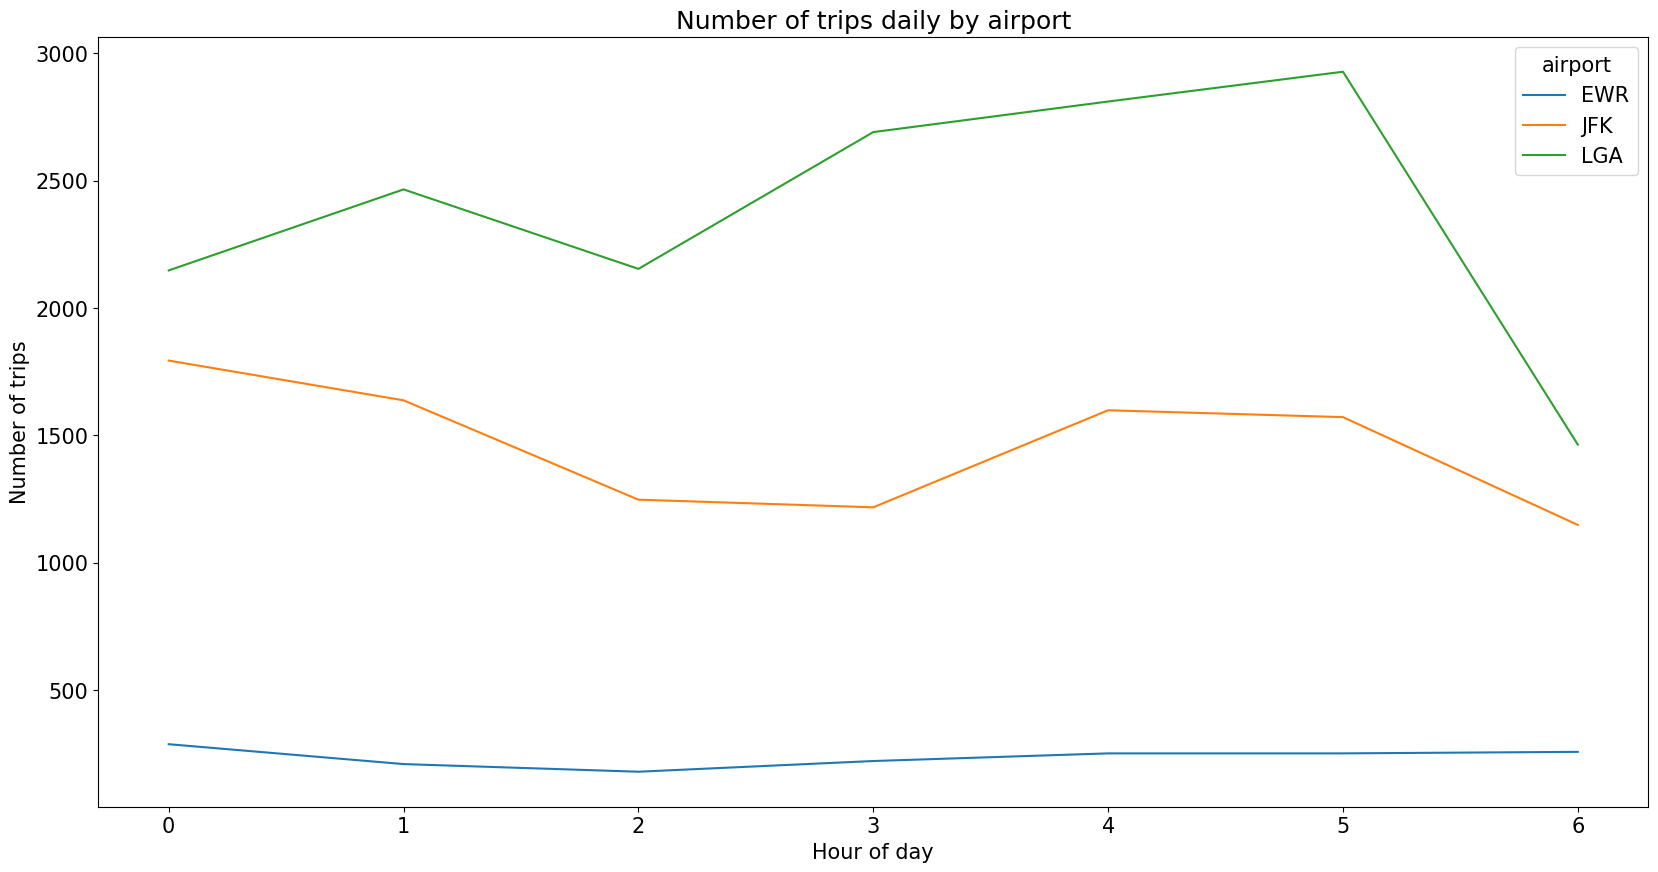

In [53]:
df_dropoff = get_data_daily_ariports_dropoff()
plot_daily_ariports_dropoff(df_dropoff)

### Visualization 4
Create a heatmap of all hired trips over a map of the area. Consider using KeplerGL or another library that helps generate geospatial visualizations.

In [54]:

def plot_heatmap_of_hired_trips(dataframe: pd.DataFrame) -> None:
    figure, axes = plt.subplots(figsize=(10, 10))
    
    taxi_zones = gpd.read_file(TAXI_ZONE_FILE).to_crs('EPSG:4326')
    
    points = gpd.points_from_xy(dataframe.pickupLon, dataframe.pickupLat)
    gdf = gpd.GeoDataFrame(points, columns=['pickupPlace'], geometry='pickupPlace', crs='EPSG:4326')
    
    ax = taxi_zones.plot(ax=axes, alpha=0.5)
    gdf.plot(ax=ax, linewidth=1)
    
    axes.set_xlabel('Longitude')
    axes.set_ylabel('Latitude')
    axes.set_title("Heatmap of all hired trips")
    
    plt.show()

In [55]:
def get_data_all_hired_trips() -> pd.DataFrame:
    
    query = """
        SELECT pickupLon, pickupLat
        FROM taxiTrips
        UNION ALL
        SELECT pickupLon, pickupLat
        FROM uberTrips
    """
    
    df = pd.read_sql(query, engine)
    
    return df

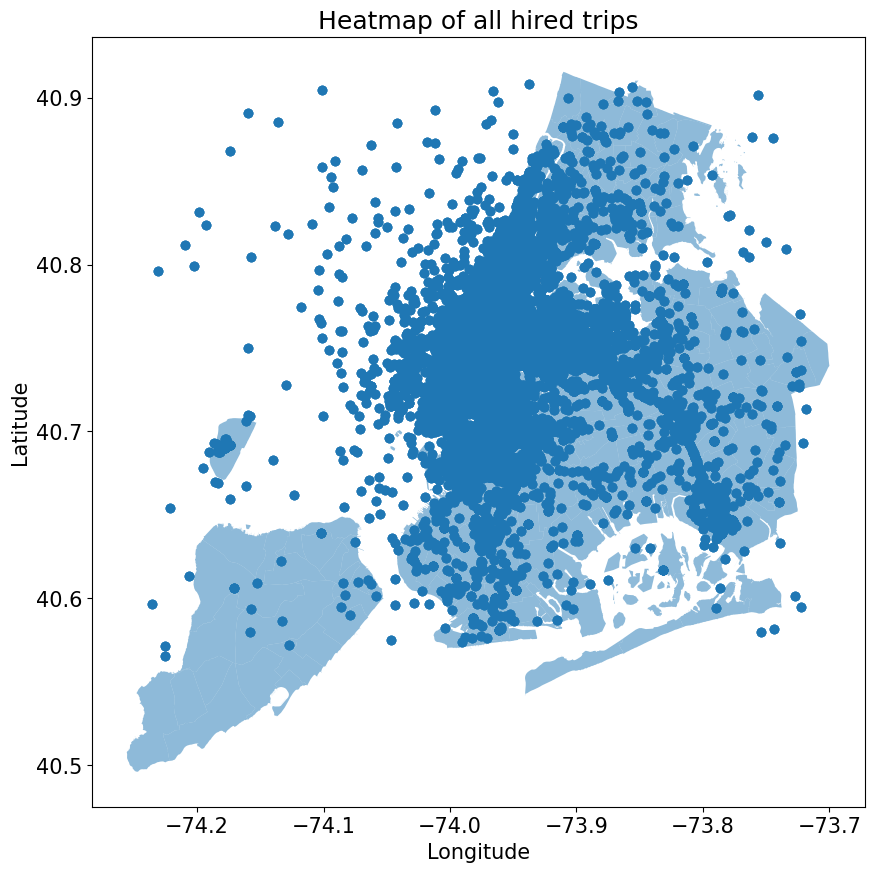

In [56]:
df_hired_trips = get_data_all_hired_trips()
taxi_zones = plot_heatmap_of_hired_trips(df_hired_trips)

### Visualization 5

Create a scatter plot that compares tip amount versus distance.

In [57]:

def plot_tip_vs_distance(dataframe: pd.DataFrame) -> None:
    figure, axes = plt.subplots(figsize=(20, 10))
    
    axes.scatter(x=dataframe['distance'], y=dataframe['tipAmt'])
    
    axes.set_xlabel('Distance')
    axes.set_ylabel('Tip amount')
    axes.set_title("Tip amount V.S. distance")
    
    plt.show()

In [58]:
def get_data_tip_vs_distance() -> pd.DataFrame:
    
    query = """
        SELECT tipAmt, distance 
        FROM taxiTrips
    """
    
    df = pd.read_sql(query, engine)
    return df

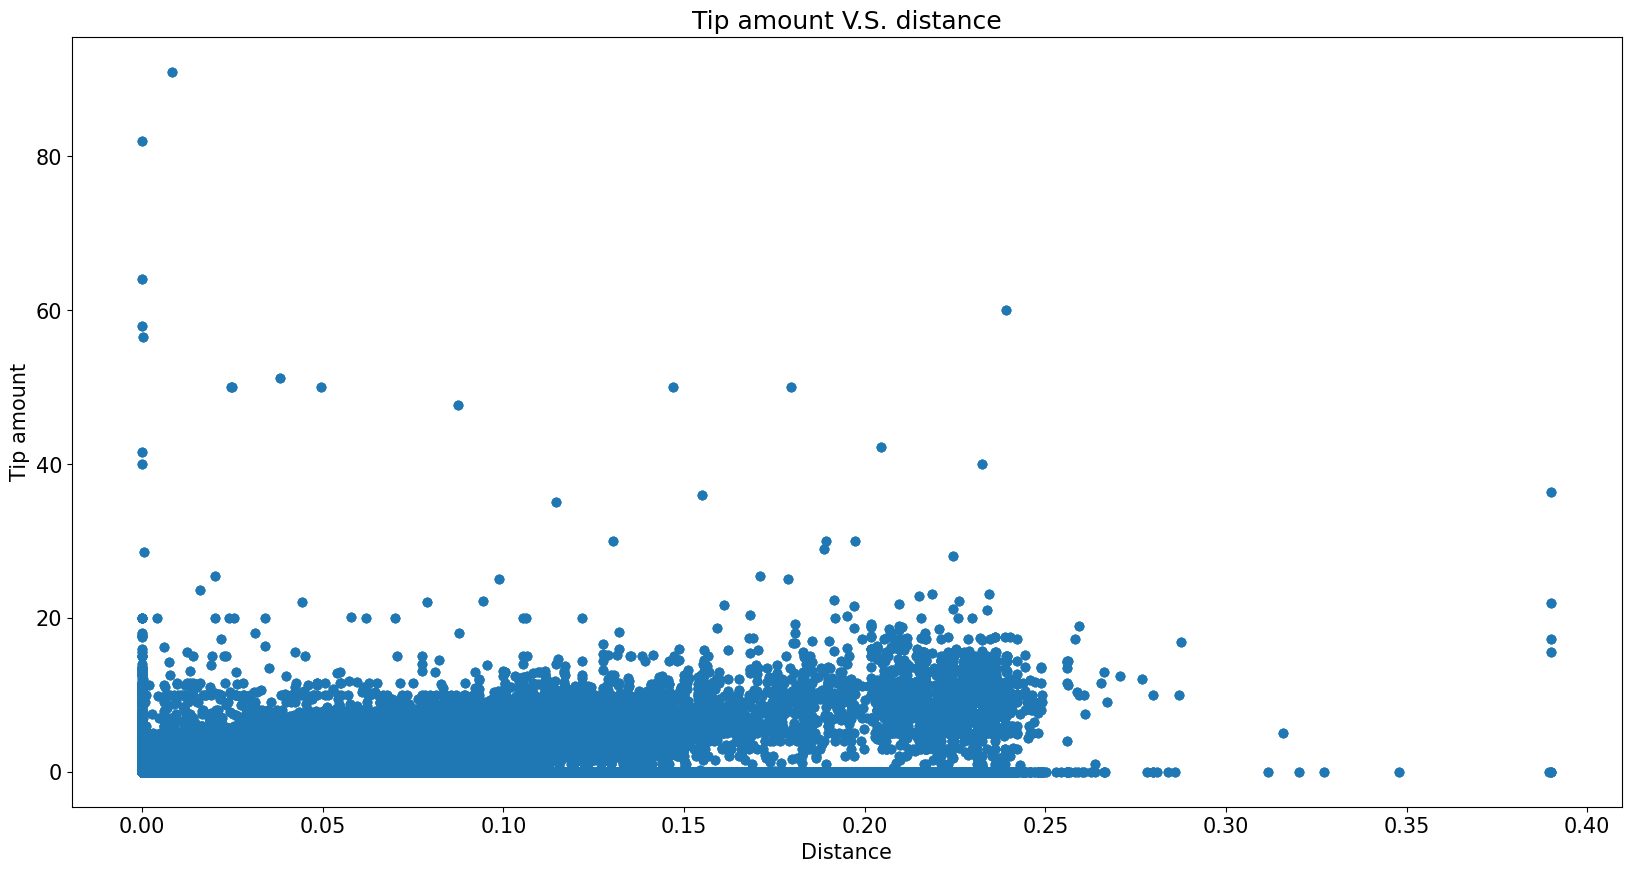

In [59]:
tip_vs_distance = get_data_tip_vs_distance()
plot_tip_vs_distance(tip_vs_distance)

### Visualization 6

In [60]:

def plot_tip_vs_precipitation(dataframe: pd.DataFrame) -> None:
    figure, axes = plt.subplots(figsize=(20, 10))
    
    axes.scatter(x=dataframe['hourlyPrecipitation'], y=dataframe['tipAmt'])
    
    axes.set_xlabel('Precipitation')
    axes.set_ylabel('Tip amount')
    axes.set_title("Tip amount V.S. distance")
    
    plt.show()

In [61]:
def get_data_tip_vs_precipitation() -> pd.DataFrame:
    
    query_1 = """
        SELECT pickupDateTime, tipAmt
        FROM taxiTrips
        ORDER BY pickupDateTime ASC
    """
    
    query_2 = """
        SELECT day, hour, hourlyPrecipitation
        FROM hourlyWeather
        ORDER BY day, hour ASC
    """
    
    df_tip = pd.read_sql(query_1, engine)
    df_precipitation = pd.read_sql(query_2, engine)
    
    df_tip['pickupDateTime'] = pd.to_datetime(df_tip['pickupDateTime'])
    
    df_precipitation['dateTime'] = pd.to_datetime(df_precipitation.apply(lambda x: f"{x['day']} {x['hour']}:00:00", axis=1))
    
    df_tip_vs_precipitation = \
        pd.merge_asof(df_tip, df_precipitation, left_on='pickupDateTime', right_on='dateTime')[['hourlyPrecipitation', 'tipAmt']]
    
    return df_tip_vs_precipitation

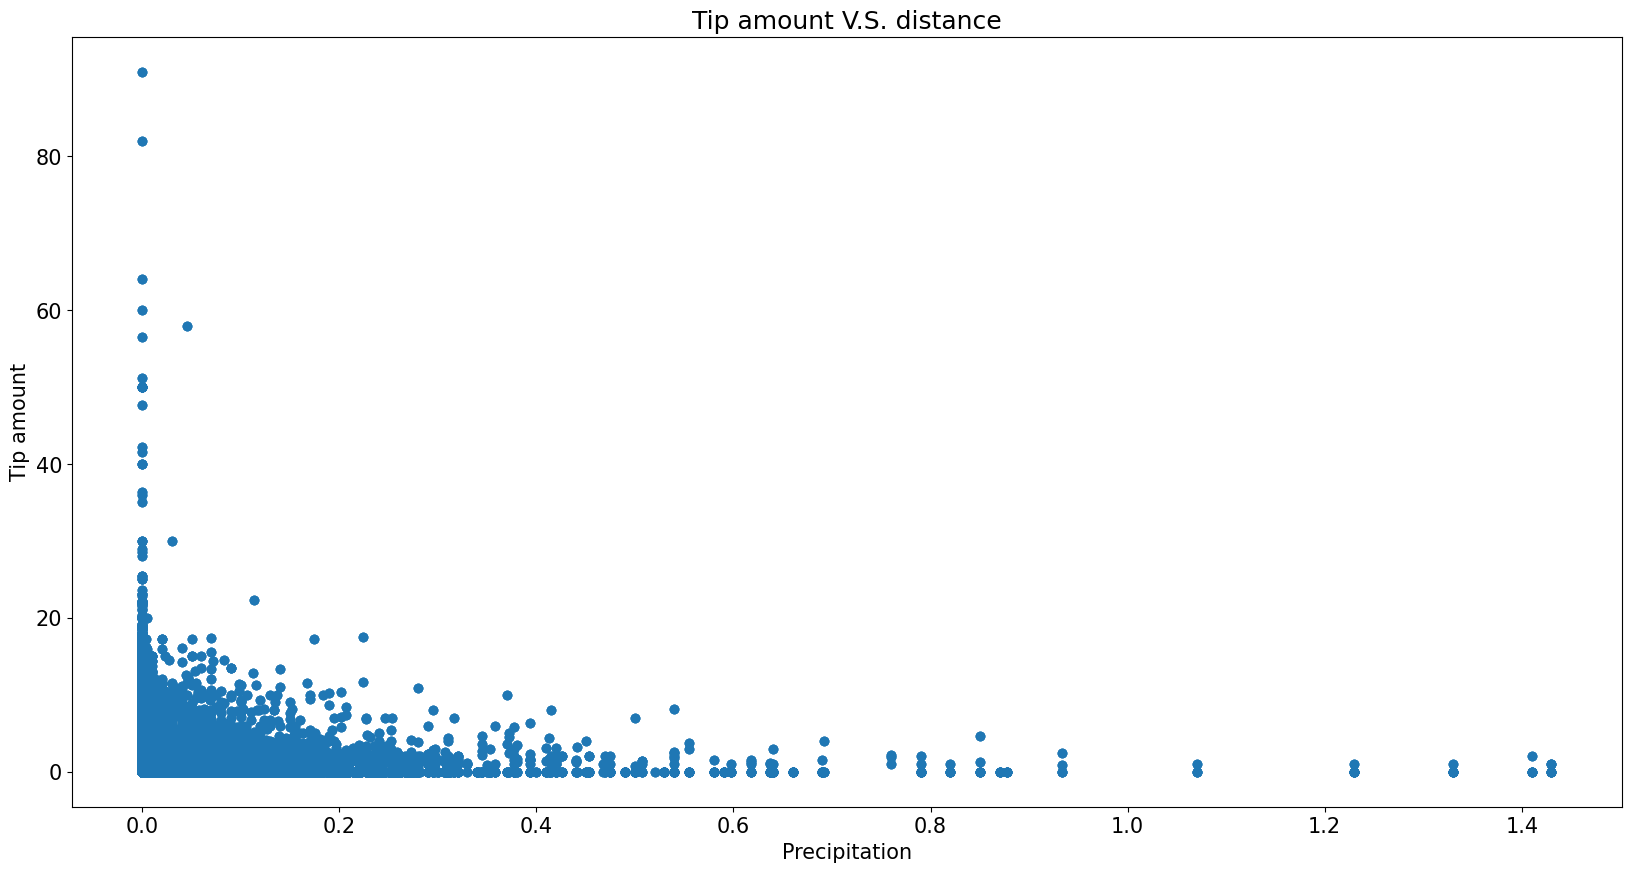

In [62]:
df_tip_vs_precipitation = get_data_tip_vs_precipitation()
plot_tip_vs_precipitation(df_tip_vs_precipitation)